#신경망, 딥러닝의 응용(필기체 숫자 인식)
필기체 숫자 데이터셋 : MNIST

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

60000개의 훈련용 데이터(이미지와 라벨) -> x_train, y_train

10000개의 테스트용 데이터 -> x_test, y_test

x_train은 60000 * 28 * 28 배열 변수, 각 요소 0-255 값 가짐

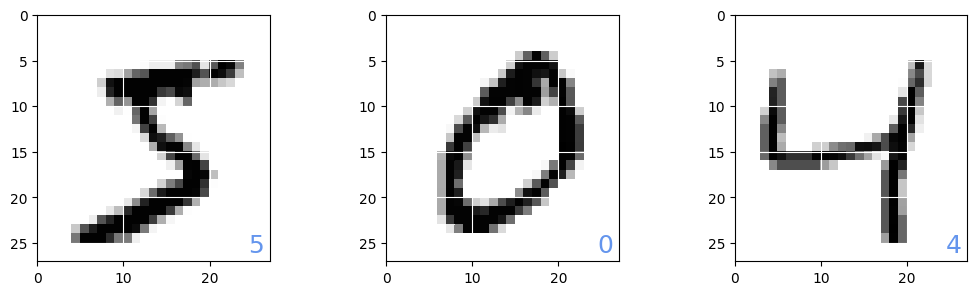

In [ ]:
# - 리스트 8-1-(2)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id],
             color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show()

###2층 피드 포워드 네트워크 모델


In [ ]:
!pip install np_utils

In [ ]:
#-- 리스트 8-1-(3)
from tensorflow.python.keras.utils import np_utils


x_train = x_train.reshape(60000, 784) # (A) # 28 * 28의 이미지 데이터를 784길이의 벡터로 처리
x_train = x_train.astype('float32') # (B) # 입력을 실수로 처리하고 싶음
x_train = x_train / 255 # (C) # 0~1의 실수로 변환
num_classes = 10 # 0~9의 정수
y_train = np_utils.to_categorical(y_train, num_classes) # (D)


x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

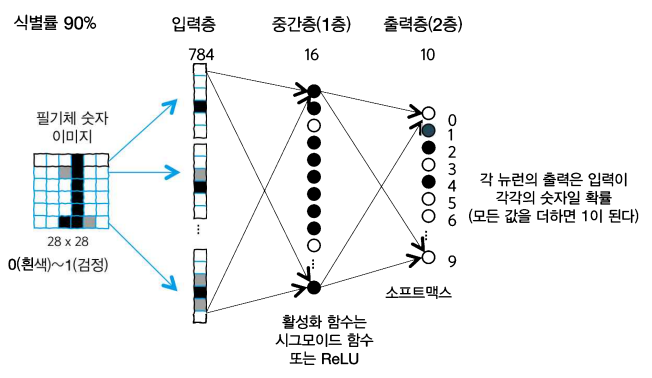

모델 정의

In [ ]:
#-- 리스트 8-1-(4)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam


model = Sequential() # (A) # 모델 정의
model.add(Dense(16, input_dim=784, activation='sigmoid')) # (B) # 784차원 입력, 16개의 중간층
model.add(Dense(10, activation='softmax')) # (C) # 10개의 출력층
model.compile(loss='categorical_crossentropy',
optimizer=Adam(), metrics=['accuracy']) # (D) # 최적화기법 adam

모델 학습

In [ ]:
#-- 리스트 8-1-(5)
import time


startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, # 1회 갱신에 사용하는 데이터의 크기
                    verbose=1, validation_data=(x_test, y_test)) # (A) # verbose = 1 -> 매 시기의 학습 평가치 표시
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 2s 19ms/step - loss: 2.0166 - accuracy: 0.4006 - val_loss: 1.7582 - val_accuracy: 0.5608
Epoch 2/10
60/60 [==============================] - 1s 11ms/step - loss: 1.5974 - accuracy: 0.6605 - val_loss: 1.4263 - val_accuracy: 0.7499
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 1.3099 - accuracy: 0.7807 - val_loss: 1.1757 - val_accuracy: 0.8145
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 1.0892 - accuracy: 0.8214 - val_loss: 0.9845 - val_accuracy: 0.8415
Epoch 5/10
60/60 [==============================] - 1s 9ms/step - loss: 0.9196 - accuracy: 0.8450 - val_loss: 0.8382 - val_accuracy: 0.8582
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.7924 - accuracy: 0.8594 - val_loss: 0.7310 - val_accuracy: 0.8678
Epoch 7/10
60/60 [==============================] - 1s 9ms/step - loss: 0.6983 - accuracy: 0.8689 - val_loss: 0.6507 - val_accuracy: 0.8775
Epoch 8/10
60/60 

갱신할 때마다 다른 1000개의 데이터셋에서 기울기가 계산된 매개 변수가 갱신됨

- 최소화 방향으로 곧장 가는게 아니라 노이즈의 영향으로 휘청거림
  - local minimum에 곧장 빠지지 않고 휘청거려서 빠져나갈 수 있음

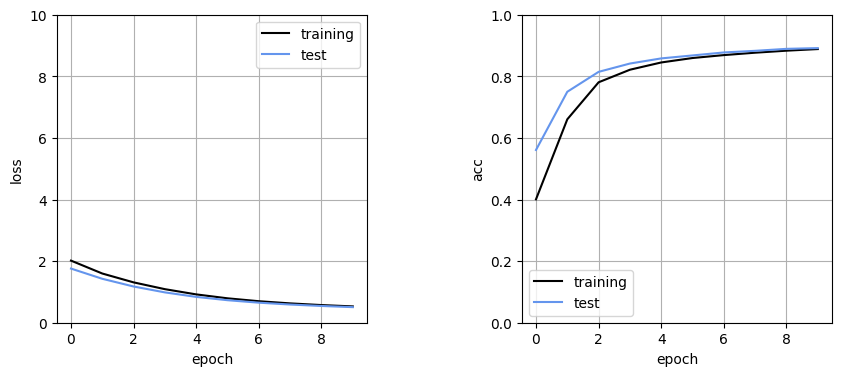

In [ ]:
# 오버피팅 확인
#-- 리스트 8-1-(6)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

오버 피팅 확인 결과 test데이터에서도 오버피팅 일어나지 않음

313/313 [==============================] - 1s 2ms/step


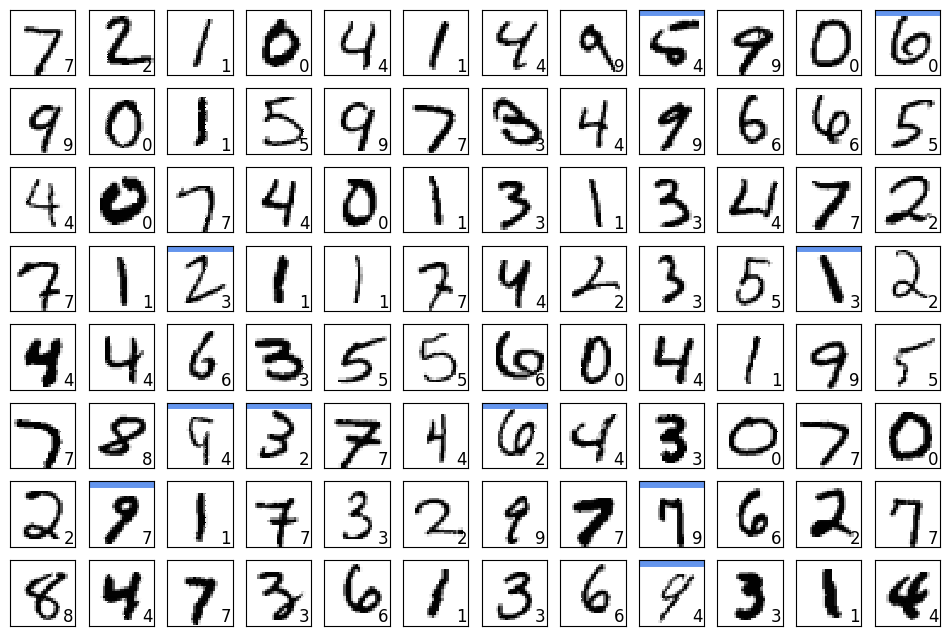

In [ ]:
#-- 리스트 8-1-(7)
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
#-- 메인
show_prediction()
plt.show()

모델의 성능 직접 확인, 잘못된 데이터 존재

###ReLU 활성화 함수
시그모이드 함수는 x가 어느 정도 커지면 항상 1에 가까운 값 출력 -> 입력의 결과가 출력에 반영되기 힘듦, 가중치 매개 변수에 대한 편미분이 0에 가까운 값이 되어 경사 하강법이 늦어지는 문제점

- ReLU사용시 양수이면 학습 정체 문제 해결, 계산도 빠름

In [ ]:
#-- 리스트 8-1-(8)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam


model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) # (A)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), metrics=['accuracy'])


startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 13ms/step - loss: 1.4269 - accuracy: 0.6141 - val_loss: 0.7620 - val_accuracy: 0.8279
Epoch 2/10
60/60 [==============================] - 1s 9ms/step - loss: 0.6052 - accuracy: 0.8501 - val_loss: 0.4712 - val_accuracy: 0.8849
Epoch 3/10
60/60 [==============================] - 0s 8ms/step - loss: 0.4370 - accuracy: 0.8870 - val_loss: 0.3775 - val_accuracy: 0.9036
Epoch 4/10
60/60 [==============================] - 0s 8ms/step - loss: 0.3677 - accuracy: 0.9019 - val_loss: 0.3328 - val_accuracy: 0.9115
Epoch 5/10
60/60 [==============================] - 0s 8ms/step - loss: 0.3293 - accuracy: 0.9102 - val_loss: 0.3035 - val_accuracy: 0.9170
Epoch 6/10
60/60 [==============================] - 0s 8ms/step - loss: 0.3051 - accuracy: 0.9158 - val_loss: 0.2846 - val_accuracy: 0.9210
Epoch 7/10
60/60 [==============================] - 0s 8ms/step - loss: 0.2881 - accuracy: 0.9197 - val_loss: 0.2722 - val_accuracy: 0.9264
Epoch 8/10
60/60 [=

활성화 함수를 relu로 바꾼 결과 정확도 약 3% 증가

313/313 [==============================] - 2s 5ms/step


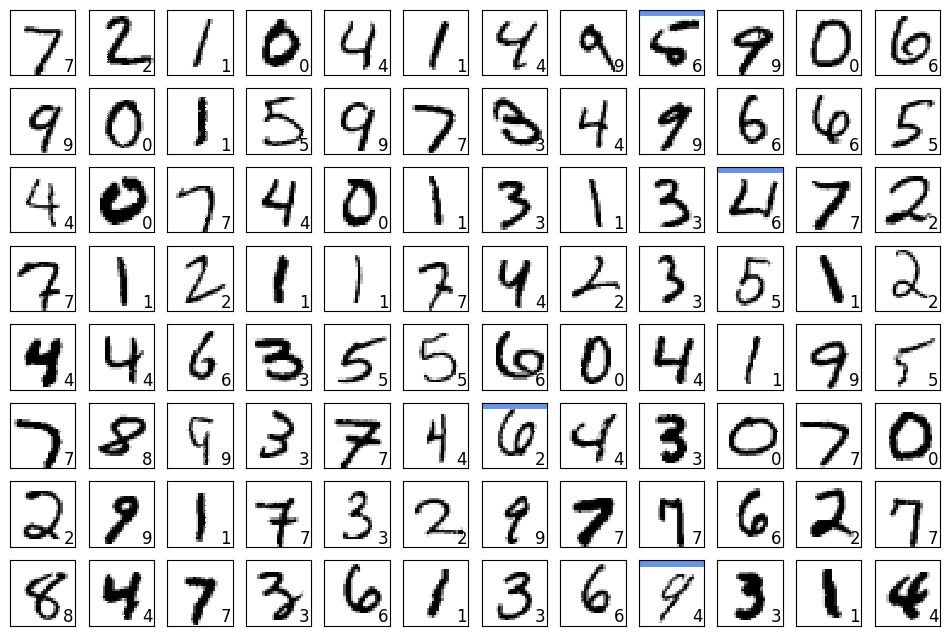

In [ ]:
# 결과 plot하기
# 리스트 8-1-(9)
show_prediction()
plt.show()

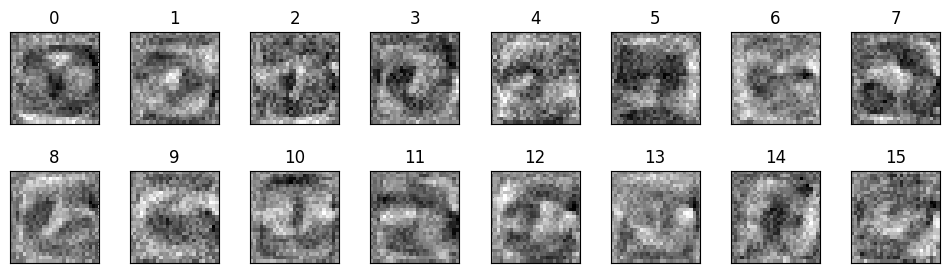

In [ ]:
#-- 리스트 8-1-(10)
# 1층째의 가중치 시각화
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

16개 뉴런 가중치, 양수인 경우 검은색, 음수인 경우 흰색

검은 부분에 문자 일부분이 있으면 그 뉴런 활성화, 흰 부분에 문자 일부분이 있으면 억제

ex) 11번 뉴런의 가중치 희미하게 2의 형태

-> 2의 이미지에서 활동이 증가하는 뉴런, 2를 인식하는데 도움이 될 것

이와 같은 방식은 이미지의 공간 정보를 사용하지 않고 있음 -> 화소의 정렬 순서가 성능과 전혀 관계가 없다

필터를 사용하여 공간 형태를 잡아낼 수 있는 방법 존재

- 이미지의 일부분과 필터 요소를 곱한 합을 이미지를 슬라이드 시키면서 이미지의 전 영역에서 구하기 : 합성곱 연산

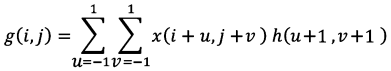

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


###MNIST데이터를 28 * 28 인채로 사용

In [ ]:
#-- 리스트 8-2-(1)
import numpy as np
from keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

가로 및 세로 엣지를 강조하는 2개의 필터를 4에 적용

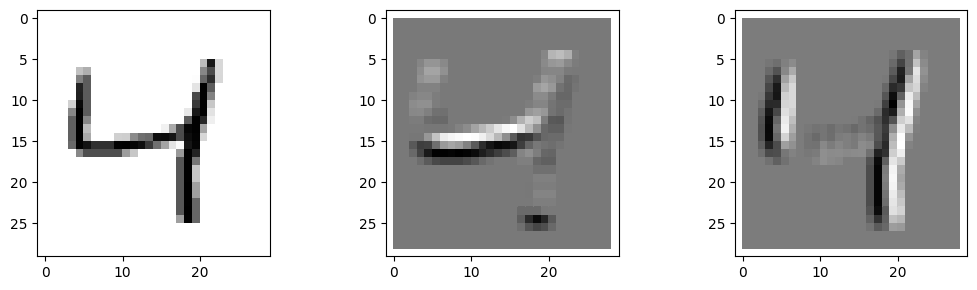

In [ ]:
#-- 리스트 8-2-(2)
import matplotlib.pyplot as plt
%matplotlib inline


id_img = 2
myfil1 = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [-2, -2, -2]], dtype=float) # (A) 가로 엣지 강조
myfil2 = np.array([[-2, 1, 1],
                   [-2, 1, 1],
                   [-2, 1, 1]], dtype=float) # (B) 세로 엣지 강조


x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# 필터 처리
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil2.reshape(-1))


# - 표시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

원래 이미지는 흰색이 0, 검정색이 1이었는데
(A)와 같은 필터를 씌우면 가로 라인의 아래쪽이 큰 값이 됨

필터의 모든 요소 더하면 0 -> 공간 구조가 없는 균일한 부분 0, 구조 존재시 0 이상의 값, 레벨 감지의 기준

필터를 적용하면 출력 이미지의 크기 작아짐 -> 패딩 적용

- 패딩

패딩은 필터를 적용하기 전에 고정 요소로 주위를 부풀려두는 방법, 이미지의 크기는 변하지 않는다

- 스트라이드

필터를 이동하는 간격, 스트라이드가 크면 출력 이미지는 작아진다

###합성곱 신경망
- 필터를 사용한 신경망
- 필터 자체를 학습시킴

ex) 크기 3 * 3, 패딩1, 스트라이드1의 필터 8장
- 출력은 28 * 28 * 8의 3차원 배열, 1차원으로 길이가 6272인 배열로 전개, 전결합으로 10개의 출력층 뉴런에 결합

In [ ]:
#-- 리스트 8-2-(3)
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time


# 바이어스는 각 필터에 1변수씩 할당됨, 초기값은 0
model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same', # gray scale이라 input 마지막 인수 1
                 input_shape=(28, 28, 1), activation='relu')) # (A) 3 * 3의 필터를 8개 사용, 출력의 크기가 변하지 않도록 패딩을 추가해 처리
model.add(Flatten()) # (B) 다음 출력층에 넣으려면 2차원으로 해야함
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 15s 186ms/step - loss: 0.9194 - accuracy: 0.7920 - val_loss: 0.3595 - val_accuracy: 0.9032
Epoch 2/20
60/60 [==============================] - 11s 184ms/step - loss: 0.3164 - accuracy: 0.9104 - val_loss: 0.2579 - val_accuracy: 0.9281
Epoch 3/20
60/60 [==============================] - 13s 226ms/step - loss: 0.2424 - accuracy: 0.9316 - val_loss: 0.2085 - val_accuracy: 0.9422
Epoch 4/20
60/60 [==============================] - 11s 177ms/step - loss: 0.1959 - accuracy: 0.9451 - val_loss: 0.1723 - val_accuracy: 0.9530
Epoch 5/20
60/60 [==============================] - 15s 244ms/step - loss: 0.1634 - accuracy: 0.9552 - val_loss: 0.1468 - val_accuracy: 0.9592
Epoch 6/20
60/60 [==============================] - 10s 159ms/step - loss: 0.1403 - accuracy: 0.9616 - val_loss: 0.1296 - val_accuracy: 0.9650
Epoch 7/20
60/60 [==============================] - 16s 269ms/step - loss: 0.1222 - accuracy: 0.9667 - val_loss: 0.1166 - val_accuracy: 0.9680

In [ ]:
#-- 리스트 8-1-(7)
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

313/313 [==============================] - 3s 9ms/step


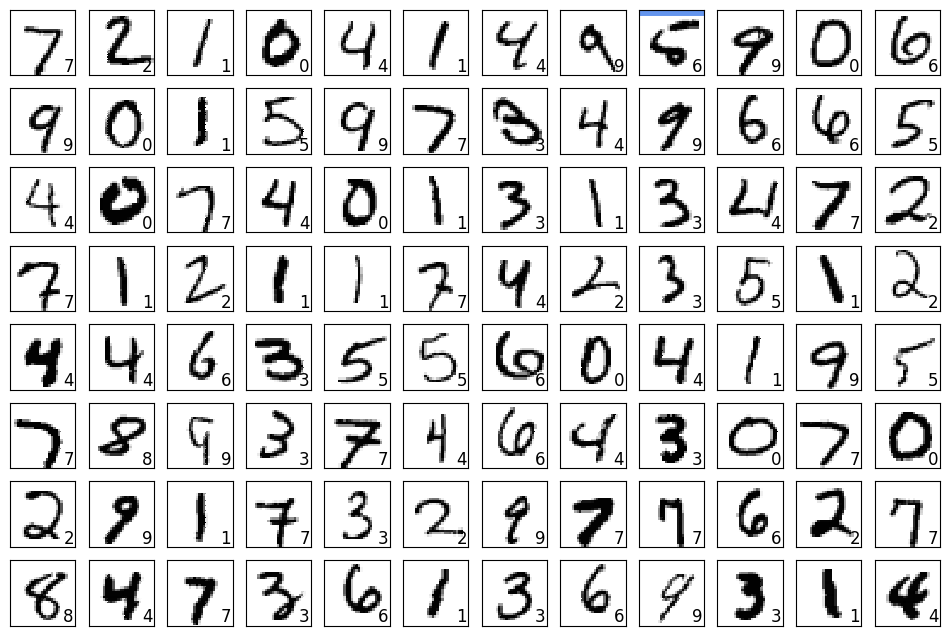

In [ ]:
# 리스트 8-2-(4)
show_prediction()
plt.show()

CNN으로 하니 정답률 매우 높아짐

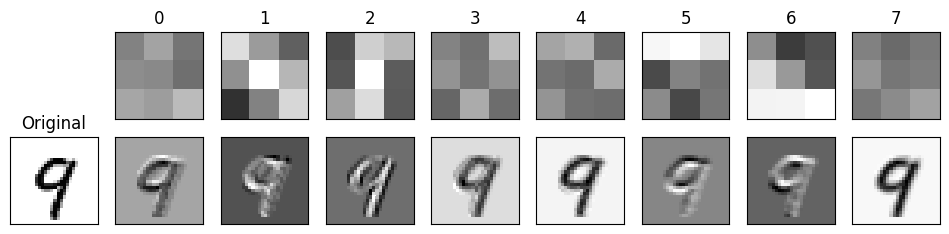

In [ ]:
# 리스트 8-2-(5)
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")


w = model.layers[0].get_weights()[0] # (A)
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    # 필터 처리
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

학습에서 획득한 필터 시각화

작은 값은 흰색, 큰 값은 검은색

EX) 5번 필터는 가로줄 위쪽 엣지 강조

###풀링
합성곱층 2차원 이미지 특징 사용

필기체 숫자 2가 1픽셀만 어긋난 이미지를 입력해도 각 배열의 수치는 완전히 달라짐 -> CNN에서도 마찬가지, 풀링 처리!

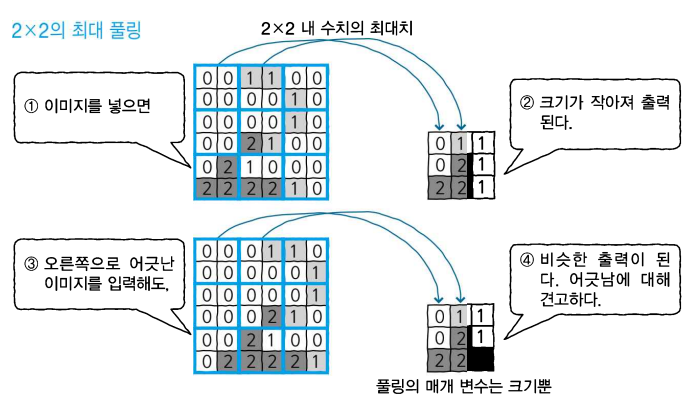

가로, 세로로 어긋난 입력을 받아도 거의 결과는 변하지 않는 특징

average pooling도 존재

###드롭아웃
- 입력층유닛과 중간층 뉴런을 확률p(p<1)로 임의 선택 -> 나머지 무효화, 존재하지 않는 것으로 하여 학습 갱신

- 미니배치마다 뉴런 뽑아 반복

- 학습 후 예측하는데는 모든 뉴런 사용
  - 예측 시에는 드롭아웃을 한 층의 출력 대상의 가중치를 p배

여러 네트워크를 각각 학습시켜 예측 시에 네트워크를 평균화해 합치는 효과

In [ ]:
# 리스트 8-2-(6)
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(16, (3, 3),
                 input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (A) maxpooling층
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (B) maxpooling층
model.add(Dropout(0.25)) # (C) 0.25 는 남은 뉴런의 비
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) # (D)
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


startTime = time.time()


history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 88s 1s/step - loss: 0.6635 - accuracy: 0.7958 - val_loss: 0.1317 - val_accuracy: 0.9599
Epoch 2/20
60/60 [==============================] - 81s 1s/step - loss: 0.1446 - accuracy: 0.9575 - val_loss: 0.0673 - val_accuracy: 0.9798
Epoch 3/20
60/60 [==============================] - 80s 1s/step - loss: 0.0946 - accuracy: 0.9707 - val_loss: 0.0453 - val_accuracy: 0.9858
Epoch 4/20
60/60 [==============================] - 80s 1s/step - loss: 0.0702 - accuracy: 0.9787 - val_loss: 0.0379 - val_accuracy: 0.9873
Epoch 5/20
60/60 [==============================] - 80s 1s/step - loss: 0.0613 - accuracy: 0.9813 - val_loss: 0.0318 - val_accuracy: 0.9900
Epoch 6/20
60/60 [==============================] - 82s 1s/step - loss: 0.0512 - accuracy: 0.9846 - val_loss: 0.0276 - val_accuracy: 0.9908
Epoch 7/20
60/60 [==============================] - 81s 1s/step - loss: 0.0472 - accuracy: 0.9855 - val_loss: 0.0260 - val_accuracy: 0.9916
Epoch 8/20
60/60 [==

Dropout까지 사용하니 매우 높은 정확도 나옴

313/313 [==============================] - 9s 28ms/step


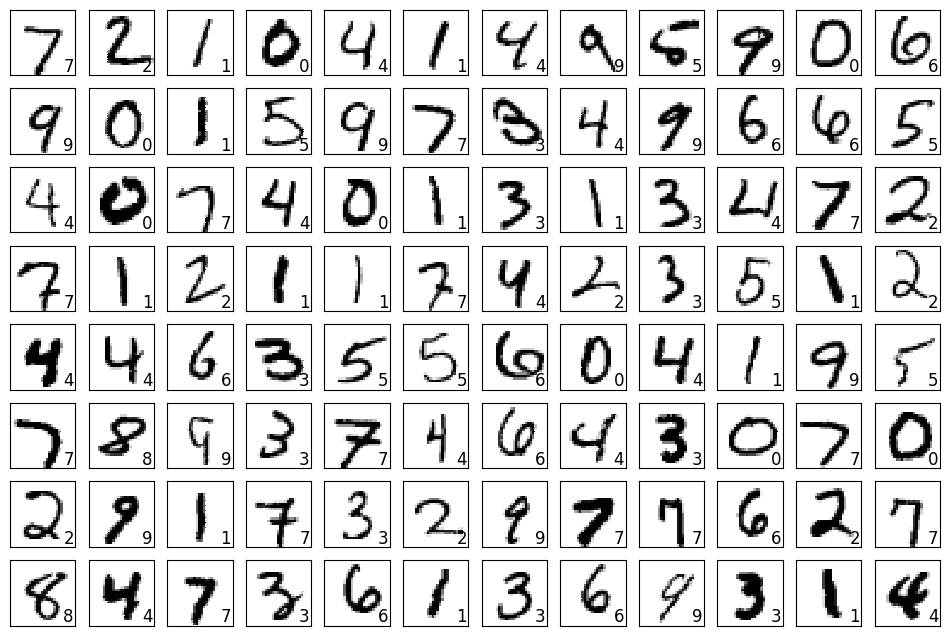

In [ ]:
# 리스트 8-2-(7)
show_prediction()
plt.show()

###After
ReLU 활성화 함수를 사용하면 Sigmoid의 gradient vanishing 문제를 완화시킬 수 있다.